In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import statsmodels.api as sm

#Data Cleaning and Wrangling

In [4]:
data = pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv",header = 1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
# missing values
data.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [6]:
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
data.loc[:121,"Region"] = 0
data.loc[122:,"Region"] = 1
data["Region"] = data["Region"].astype(int)
data.isna().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [8]:
data.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [9]:
data = data.drop(122)
data = data.drop(123)
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [10]:
data.dropna(inplace = True)
data.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [11]:
data = data.reset_index(drop = True)
data.iloc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1


In [12]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.upper()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DAY          243 non-null    object
 1   MONTH        243 non-null    object
 2   YEAR         243 non-null    object
 3   TEMPERATURE  243 non-null    object
 4   RH           243 non-null    object
 5   WS           243 non-null    object
 6   RAIN         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  CLASSES      243 non-null    object
 14  REGION       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [13]:
# updating column datatypes
int_cols = ["DAY","MONTH","YEAR"]
data[int_cols]= data[int_cols].astype(int)
data[data.columns[3:13]] = data[data.columns[3:13]].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAY          243 non-null    int64  
 1   MONTH        243 non-null    int64  
 2   YEAR         243 non-null    int64  
 3   TEMPERATURE  243 non-null    float64
 4   RH           243 non-null    float64
 5   WS           243 non-null    float64
 6   RAIN         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  CLASSES      243 non-null    object 
 14  REGION       243 non-null    int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 28.6+ KB


In [14]:
data.describe()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,REGION
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [15]:
data["CLASSES"] = data["CLASSES"].str.strip()
data["CLASSES"].drop_duplicates()

,CLASSES
0,not fire
5,fire


In [16]:
df = data.copy()
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.loc[data["CLASSES"]=="not fire","CLASSES_NUM"] = 0
df.loc[data["CLASSES"]=="fire","CLASSES_NUM"] = 1
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


In [18]:
df[["CLASSES","CLASSES_NUM"]].drop_duplicates()

,CLASSES,CLASSES_NUM
0,not fire,0.0
5,fire,1.0


In [19]:
df.to_csv("algeria_cleaned.csv",index = False)

#Exploratory Data Analysis

In [20]:
df1 = df.copy()
df1 = df1.drop(["DAY","MONTH","YEAR"],axis = 1)
df1.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


array([[<Axes: title={'center': 'TEMPERATURE'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'WS'}>],
       [<Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'REGION'}>,
        <Axes: title={'center': 'CLASSES_NUM'}>]], dtype=object)

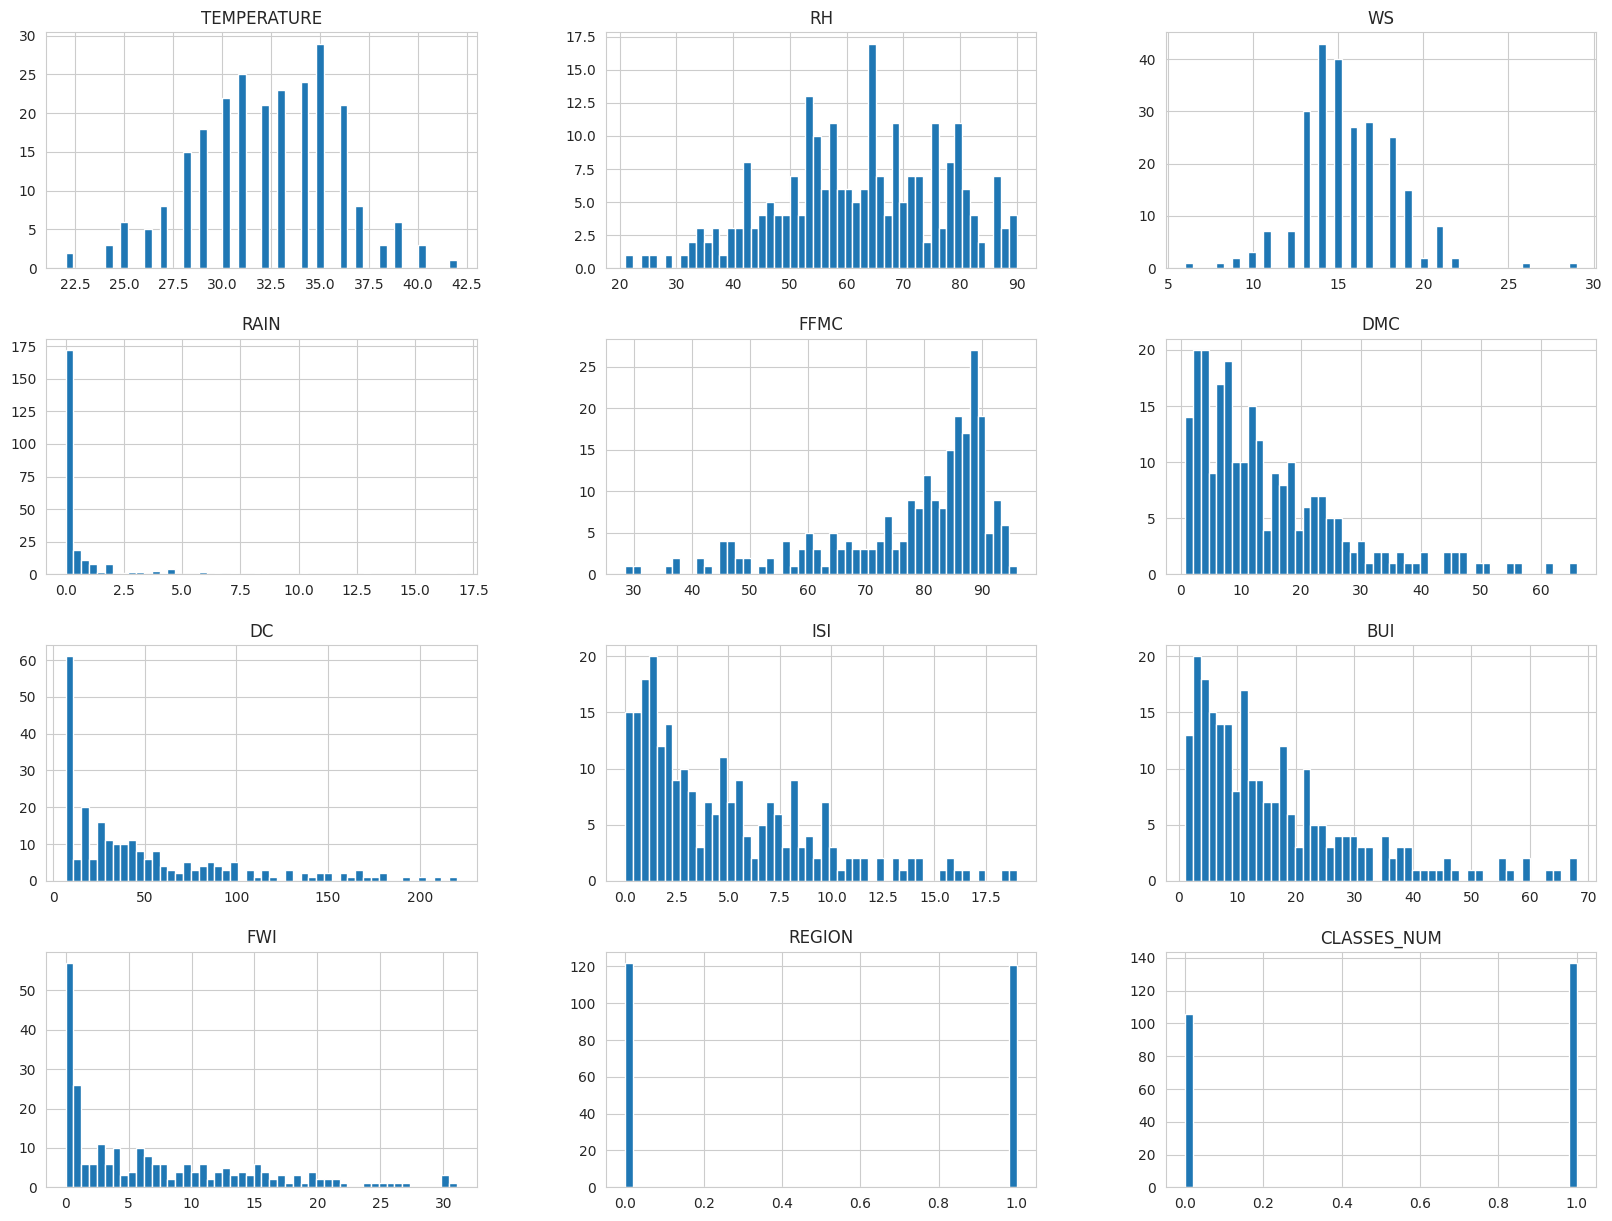

In [21]:
sns.set_style("whitegrid")
df1.hist(bins = 50,figsize = (20,15))

In [22]:
percentage = df1["CLASSES"].value_counts(normalize = True) #normalize gives percentages
percentage

,proportion
CLASSES,
fire,0.563786
not fire,0.436214


([<matplotlib.patches.Wedge at 0x7813d72db350>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'Fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'Not Fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

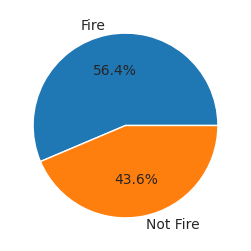

In [23]:
classlabels = ["Fire","Not Fire"]
plt.figure(figsize = (5,3))
plt.pie(percentage,labels = classlabels,autopct = "%1.1f%%")

In [24]:
df1.drop("CLASSES",axis = 1).corr()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,REGION,CLASSES_NUM
TEMPERATURE,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,-0.432161
WS,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,-0.069964
RAIN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,0.719216


<Axes: >

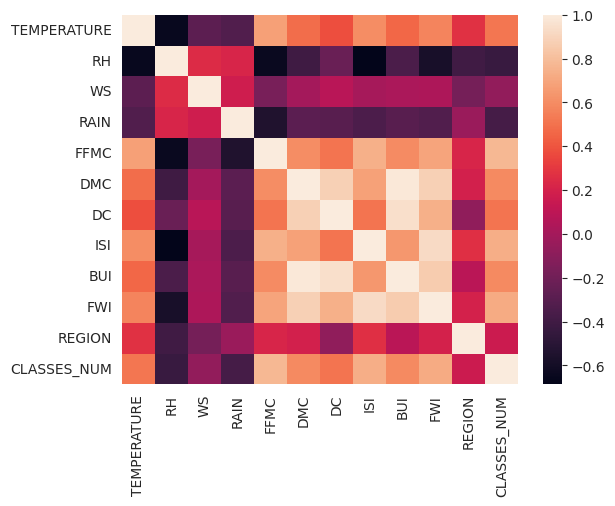

In [25]:
sns.heatmap(df1.drop("CLASSES",axis = 1).corr())

<Axes: ylabel='FWI'>

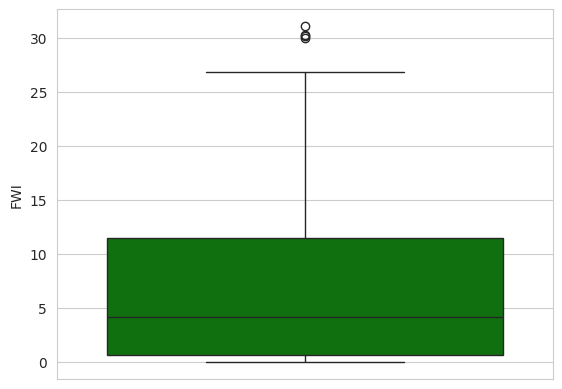

In [26]:
sns.boxplot(df1["FWI"],color = "green")

Text(0.5, 1.0, 'Fire analysis of Bejaia Region ')

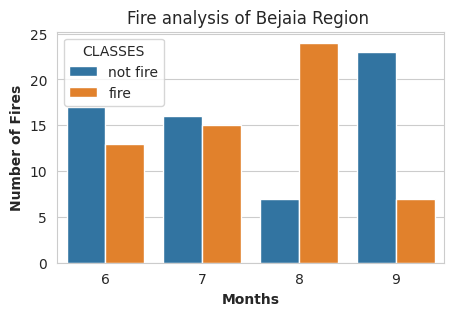

In [27]:
# monthly fire analysis
dftemp = df.loc[df["REGION"]==0]
plt.subplots(figsize = (5,3))
sns.set_style("whitegrid")
sns.countplot(x = "MONTH",hue = "CLASSES",data = dftemp)
plt.ylabel("Number of Fires",weight = 'bold')
plt.xlabel("Months",weight = "bold")
plt.title("Fire analysis of Bejaia Region ")

Text(0.5, 1.0, 'Fire analysis of Sidibel Region ')

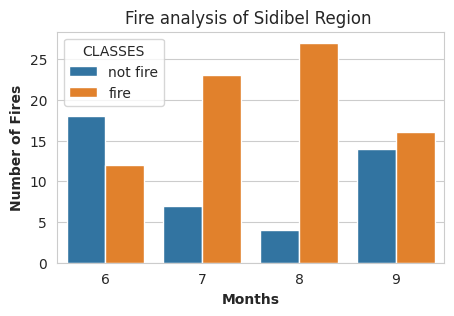

In [28]:
dftemp = df.loc[df["REGION"]==1]
plt.subplots(figsize = (5,3))
sns.set_style("whitegrid")
sns.countplot(x = "MONTH",hue = "CLASSES",data = dftemp)
plt.ylabel("Number of Fires",weight = 'bold')
plt.xlabel("Months",weight = "bold")
plt.title("Fire analysis of Sidibel Region ")

#Feature Selection and Scaling

In [29]:
df = pd.read_csv("/content/algeria_cleaned.csv")
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


In [30]:
df.drop(["DAY","MONTH","YEAR"],axis = 1,inplace = True)
df.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION,CLASSES_NUM
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0


In [31]:
df[["CLASSES","CLASSES_NUM"]].value_counts()

,,count
CLASSES,CLASSES_NUM,
fire,1.0,137
not fire,0.0,106


In [32]:
# dependent and independent features
x = df.drop(["CLASSES","FWI"],axis = 1)
y = df["FWI"] #series

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(182, 11)
(182,)
(61, 11)
(61,)


*Multicollinearity recap* :

*   checks for multicollinearity i.e. explanatory variables are linearly independent : correlation , variance inflation factor
*   condition number of matrix X
*   solutions to multicollinearity- drop correlated regressors, or combine them into one, regularization methods like ridge and lasso, increase sample size
*   source : https://statlect.com/fundamentals-of-statistics/multicollinearity


<Axes: >

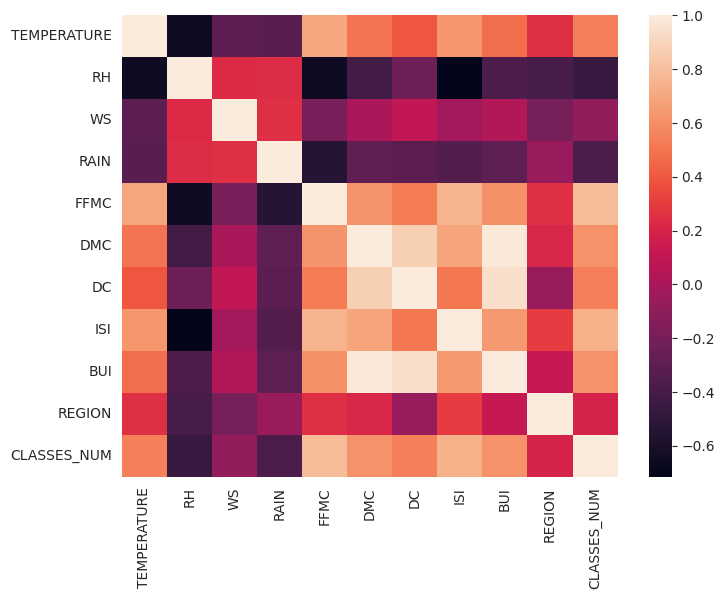

In [33]:
plt.figure(figsize = (8,6))
corr = x_train.corr()
sns.heatmap(corr)

In [34]:
(corr>0.8).sum()

,0
TEMPERATURE,1
RH,1
WS,1
RAIN,1
FFMC,1
DMC,3
DC,3
ISI,1
BUI,3
REGION,1


In [35]:
def correlated_features(data,threshold):
  """ function to identify correlated features by parsing though the upper half of matrix;
      inputs are the data(pandas dataframe) and correlation coefficient threshold;
      output is a list of correlated columns with their correlation coefficients.
  """
  correlated_columns = []
  corr_matrix = data.corr()
  n = len(corr_matrix)
  for i in range(n):
    for j in range(i+1,n):
      if corr_matrix.iloc[i,j] > threshold :
        correlated_columns.append([corr_matrix.index[i],corr_matrix.columns[j],round(float(corr_matrix.iloc[i,j]),2)])

  print(correlated_columns)

In [36]:
correlated_features(x_train,0.85)

[['DMC', 'DC', 0.87], ['DMC', 'BUI', 0.98], ['DC', 'BUI', 0.94]]


In [37]:
# drop features with correlation coeff. > 0.85
x_train.drop(["BUI","DC"],axis = 1 ,inplace = True)
x_test.drop(["BUI","DC"],axis = 1 ,inplace = True)
x_train.head()

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,ISI,REGION,CLASSES_NUM
97,29.0,74.0,19.0,0.1,75.8,3.6,2.1,0,0.0
141,31.0,72.0,14.0,0.2,60.2,3.8,0.8,1,0.0
192,40.0,31.0,15.0,0.0,94.2,22.5,16.6,1,1.0
68,32.0,60.0,18.0,0.3,77.1,11.3,2.2,0,0.0
119,32.0,47.0,14.0,0.7,77.5,7.1,1.8,0,0.0


*Feature scaling recap*

*   feature scaling : standardization (Z-score) OR normalization (min-max
scaling)
*   normalization : imposes a predefined range of [0,1] or [-1,+1]; hence useful when no outliers; and data is more or less uniformly distributed.
*   standardization : assumes data is following gaussian distribution and translates original data to adjust its mean and sd. Outliers do not affect this.
*   source : https://www.geeksforgeeks.org/machine-learning/normalization-vs-standardization/





array([[<Axes: title={'center': 'TEMPERATURE'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'WS'}>],
       [<Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'REGION'}>,
        <Axes: title={'center': 'CLASSES_NUM'}>]], dtype=object)

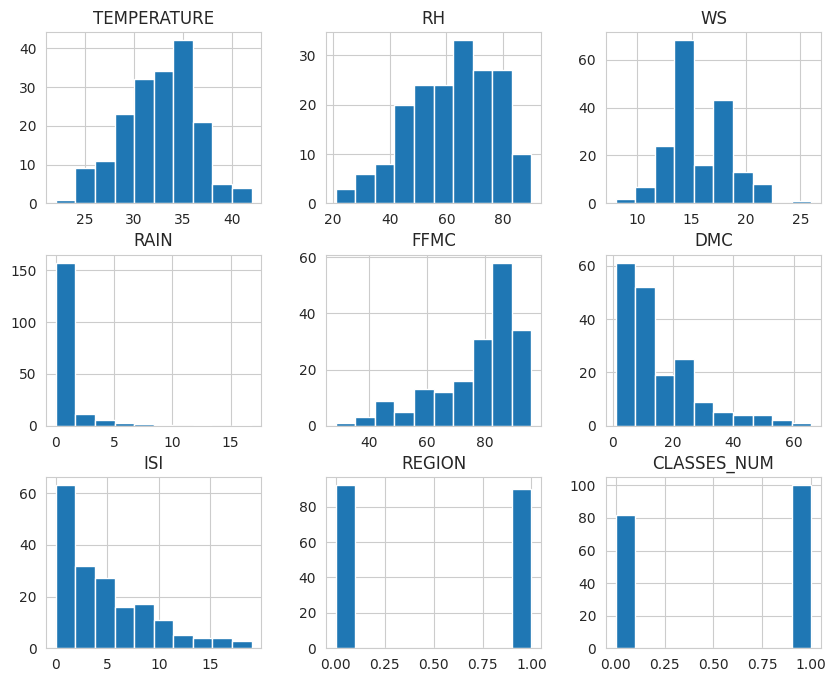

In [38]:
sns.set_style("whitegrid")
x_train.hist(figsize = (10,8))

In [39]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

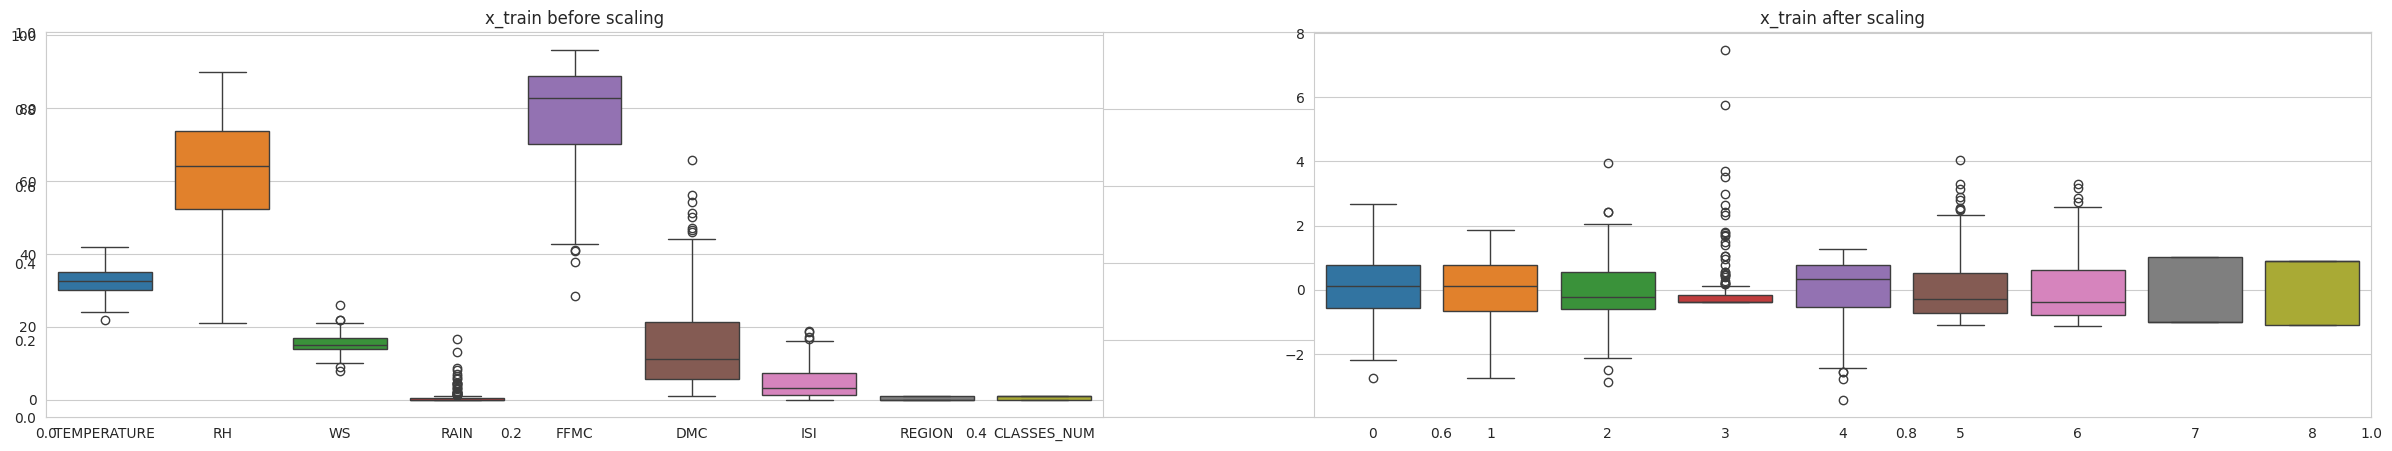

In [40]:
# box plots to understand effect of standard scaler
plt.subplots(figsize = (30,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = x_train_std)
plt.title("x_train after scaling")

#Model Training

## Linear Regression

Mean absolute error (test data) : 0.99
R-squared : 0.96


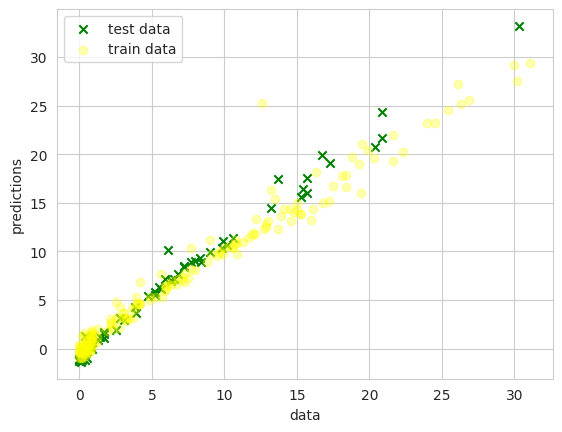

In [41]:
linreg = LinearRegression()
linreg.fit(x_train_std,y_train)
y_pred = linreg.predict(x_test_std)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean absolute error (test data) :",round(mae,2))
print("R-squared :",round(r2,2))

plt.scatter(y_test,y_pred,label ="test data", marker ="x",color = "green")
plt.scatter(y_train,linreg.predict(x_train_std),color = "yellow",alpha=0.3,label ="train data")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()

In [42]:
linreg.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298, -0.39259928,  0.40422124])

In [43]:
linreg.intercept_

np.float64(7.156043956043957)

To see the p-values for your linear regression model, you can use the `statsmodels` library, which provides more detailed statistical output than scikit-learn. First, we need to add a constant to our independent variables (features) for the intercept term, as `statsmodels` handles the intercept differently.

In [44]:
import statsmodels.api as sm

# Add a constant (intercept) to the independent variables for statsmodels
x_train_sm = sm.add_constant(x_train_std)
x_test_sm = sm.add_constant(x_test_std)

# Fit the OLS (Ordinary Least Squares) model
model_sm = sm.OLS(y_train, x_train_sm).fit()

# Print the model summary to see p-values and other statistics
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     616.0
Date:                Wed, 28 Jan 2026   Prob (F-statistic):          7.01e-126
Time:                        16:48:06   Log-Likelihood:                -310.05
No. Observations:                 182   AIC:                             640.1
Df Residuals:                     172   BIC:                             672.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1560      0.101     70.602      0.0

Calculate Variance Inflation Factor (VIF)

VIF is calculated for each independent variable by regressing it against all other independent variables. A high VIF indicates that the variable is highly correlated with other variables in the model, suggesting multicollinearity.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF should be calculated on the original features before adding the constant
# x_train_std already has been scaled, and previously we removed highly correlated features.

# Create a DataFrame from x_train_std for easier VIF calculation and display
features = x_train.columns
x_train_df = pd.DataFrame(x_train_std, columns=features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features
vif_data["VIF"] = [variance_inflation_factor(x_train_df.values, i) for i in range(len(features))]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
4,FFMC,5.213932
6,ISI,4.852028
8,CLASSES_NUM,3.498621
1,RH,3.226461
0,TEMPERATURE,2.450813
5,DMC,2.136017
3,RAIN,1.596844
2,WS,1.328121
7,REGION,1.224795


## Lasso Regression

Lasso regression results : 
Mean absolute error (test data) : 0.96
R-squared : 0.97


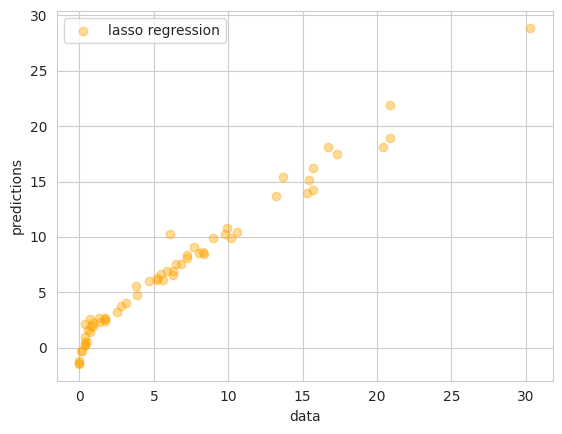

In [46]:
from sklearn.linear_model import Lasso

lassoreg = Lasso()
lassoreg.fit(x_train_std,y_train)

y_pred_lasso = lassoreg.predict(x_test_std)

mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

print("Lasso regression results : ")
print("Mean absolute error (test data) :",round(mae_lasso,2))
print("R-squared :",round(r2_lasso,2))

plt.scatter(y_test,y_pred_lasso,color = "orange",alpha=0.4,label ="lasso regression")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()

## Ridge Regression

Ridge regression results : 
Mean absolute error (test data) : 0.99
R-squared : 0.96



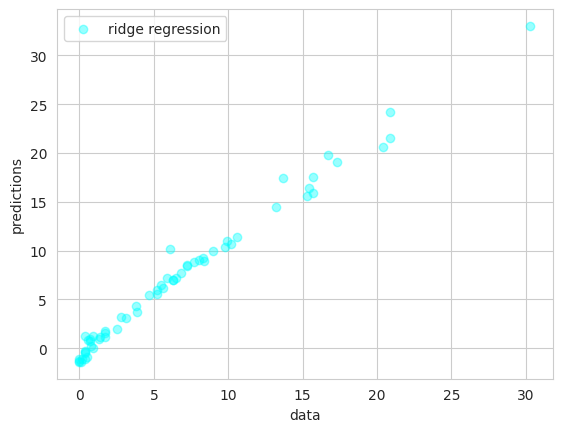

In [47]:
ridgereg = Ridge()
ridgereg.fit(x_train_std,y_train)

y_pred_ridge = ridgereg.predict(x_test_std)

mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

print("Ridge regression results : ")
print("Mean absolute error (test data) :",round(mae_ridge,2))
print("R-squared :",round(r2_ridge,2))
print()

plt.scatter(y_test,y_pred_ridge,color = "cyan",alpha=0.4,label ="ridge regression")

plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()

## Elasticnet Regression

Elasticnet regression results : 
Mean absolute error (test data) : 1.65
R-squared : 0.91



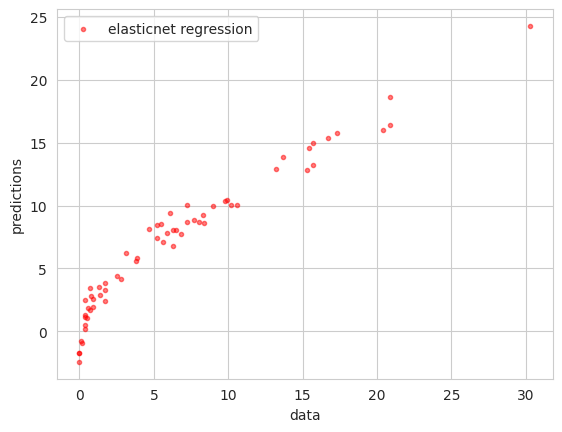

In [48]:
from sklearn.linear_model import ElasticNet
enreg = ElasticNet()
enreg.fit(x_train_std,y_train)

y_pred_en = enreg.predict(x_test_std)

mae_en = mean_absolute_error(y_test,y_pred_en)
mse_en = mean_squared_error(y_test,y_pred_en)
r2_en = r2_score(y_test,y_pred_en)

print("Elasticnet regression results : ")
print("Mean absolute error (test data) :",round(mae_en,2))
print("R-squared :",round(r2_en,2))
print()

plt.scatter(y_test,y_pred_en,marker =".",color = "red",alpha = 0.5,label ="elasticnet regression")

plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()

Comparing models (before hyperparameter tuning)

Linear regression results : 
Mean absolute error (test data) : 0.99
R-squared : 0.96

Lasso regression results : 
Mean absolute error (test data) : 0.96
R-squared : 0.97

Ridge regression results : 
Mean absolute error (test data) : 0.99
R-squared : 0.96

Elasticnet regression results : 
Mean absolute error (test data) : 1.65
R-squared : 0.91



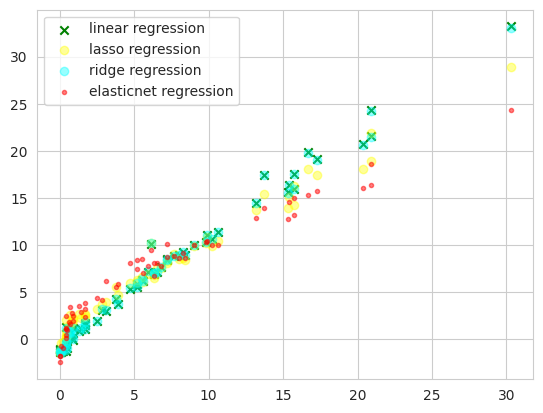

In [49]:
print("Linear regression results : ")
print("Mean absolute error (test data) :",round(mae,2))
print("R-squared :",round(r2,2))
print()

print("Lasso regression results : ")
print("Mean absolute error (test data) :",round(mae_lasso,2))
print("R-squared :",round(r2_lasso,2))
print()

print("Ridge regression results : ")
print("Mean absolute error (test data) :",round(mae_ridge,2))
print("R-squared :",round(r2_ridge,2))
print()

print("Elasticnet regression results : ")
print("Mean absolute error (test data) :",round(mae_en,2))
print("R-squared :",round(r2_en,2))
print()

plt.scatter(y_test,y_pred,label ="linear regression", marker ="x",color = "green")
plt.scatter(y_test,y_pred_lasso,color = "yellow",alpha=0.4,label ="lasso regression")
plt.scatter(y_test,y_pred_ridge,color = "cyan",alpha=0.4,label ="ridge regression")
plt.scatter(y_test,y_pred_en,marker =".",color = "red",alpha = 0.5,label ="elasticnet regression")
plt.legend()

#CrossValidation

In [99]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

In [100]:
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_std,y_train)

ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_std,y_train)

elastnetcv = ElasticNetCV(cv=5)
elastnetcv.fit(x_train_std,y_train)

ElasticNetCV(cv=5)

Test mean squared error (Lasso) : 1.72
Test mean squared error (Ridge) : 1.7
Test mean squared error (ElasticNet) : 1.61


Text(0, 0.5, 'predicted')

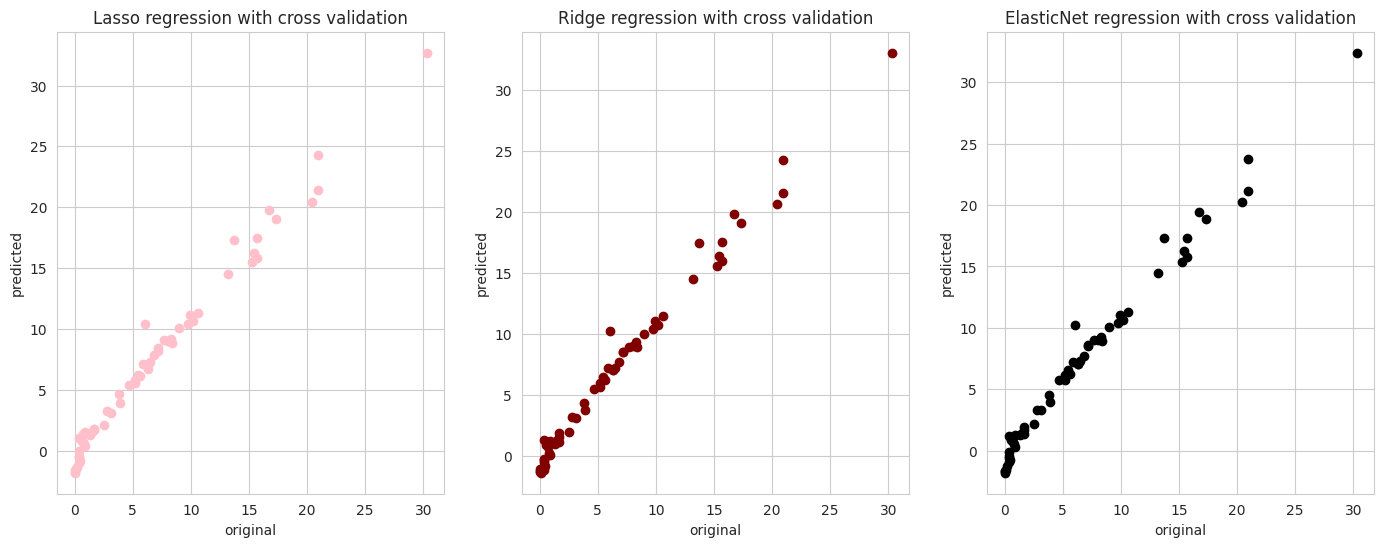

In [102]:
yhat_lasso = lassocv.predict(x_test_std)
mse_lasso = round(mean_squared_error(y_test,yhat_lasso),2)
print("Test mean squared error (Lasso) :",mse_lasso)

yhat_ridge = ridgecv.predict(x_test_std)
mse_ridge = round(mean_squared_error(y_test,yhat_ridge),2)
print("Test mean squared error (Ridge) :",mse_ridge)

yhat_elastnet = elastnetcv.predict(x_test_std)
mse_elastnet = round(mean_squared_error(y_test,yhat_elastnet),2)
print("Test mean squared error (ElasticNet) :",mse_elastnet)

fig,ax = plt.subplots(1,3,figsize = (17,6))
ax[0].scatter(y_test,yhat_lasso, color = "pink")
ax[0].set_title("Lasso regression with cross validation")
ax[0].set_xlabel("original")
ax[0].set_ylabel("predicted")

ax[1].scatter(y_test,yhat_ridge, color = "maroon")
ax[1].set_title("Ridge regression with cross validation")
ax[1].set_xlabel("original")
ax[1].set_ylabel("predicted")

ax[2].scatter(y_test,yhat_elastnet, color = "black")
ax[2].set_title("ElasticNet regression with cross validation")
ax[2].set_xlabel("original")
ax[2].set_ylabel("predicted")

In [56]:
lassocv.alpha_ #final alpha

np.float64(0.05725391318234408)

In [66]:
lassocv.alphas_ #alpha tuning experiments

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [68]:
lassocv.mse_path_.shape

(100, 5)

In [72]:
np.min(lassocv.mse_path_)

np.float64(0.7070828690181796)

In [73]:
np.max(lassocv.mse_path_)

np.float64(77.90299065907715)

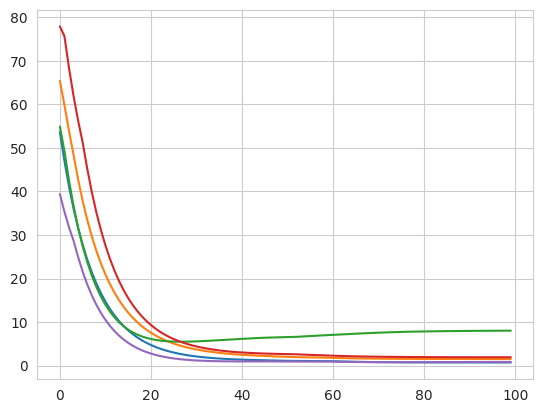

In [89]:
plt.plot(lassocv.mse_path_)